In [1]:
import numpy as np
from typing import List
from tqdm import tqdm
import jax.numpy as jnp

from solver import pde_solution
from kl_extension import KLExpansion
from utils import get_d_from_u

In [23]:
datadir = "data/point3_100k"

idx = 3

m, e, d = np.load(f'{datadir}/m.npy')[idx], np.load(f'{datadir}/e.npy')[idx], np.load(f'{datadir}/d.npy')[idx]
m0 = np.random.normal(size = 16)

In [24]:
m.shape, e.shape, d.shape

((16,), (2,), (3,))

In [25]:
points = [(10, 10), (30, 30), (50, 10)]

kl = KLExpansion(grid=(64, 64))
kl.calculate_eigh()

In [6]:
import matplotlib.pyplot as plt

In [26]:

def ode_function(t, m, d, e):
    m = m.reshape(1, -1)
    t = jnp.array(t).reshape(1,-1)
    inputs = jnp.concatenate([m, d, e, t], axis=1)
    return predict(params, inputs)[0]

In [14]:
log_kappa = kl.expansion(m)
u = pde_solution(log_kappa, e)
d = get_d_from_u(u, points)

m0 = jnp.array(m0).reshape(1,-1)
m = jnp.array(m).reshape(1,-1)
e = jnp.array(e).reshape(1,-1)
d = jnp.array(d).reshape(1,-1)
solution = solve_ivp(ode_function, t_span=[0, 1], y0=m0[0], t_eval=None, args=(d, e))
log_kappa = kl.expansion(solution.y[:, -1])
u = pde_solution(log_kappa, e[0], verbose=False)

9.949634339934943e-07


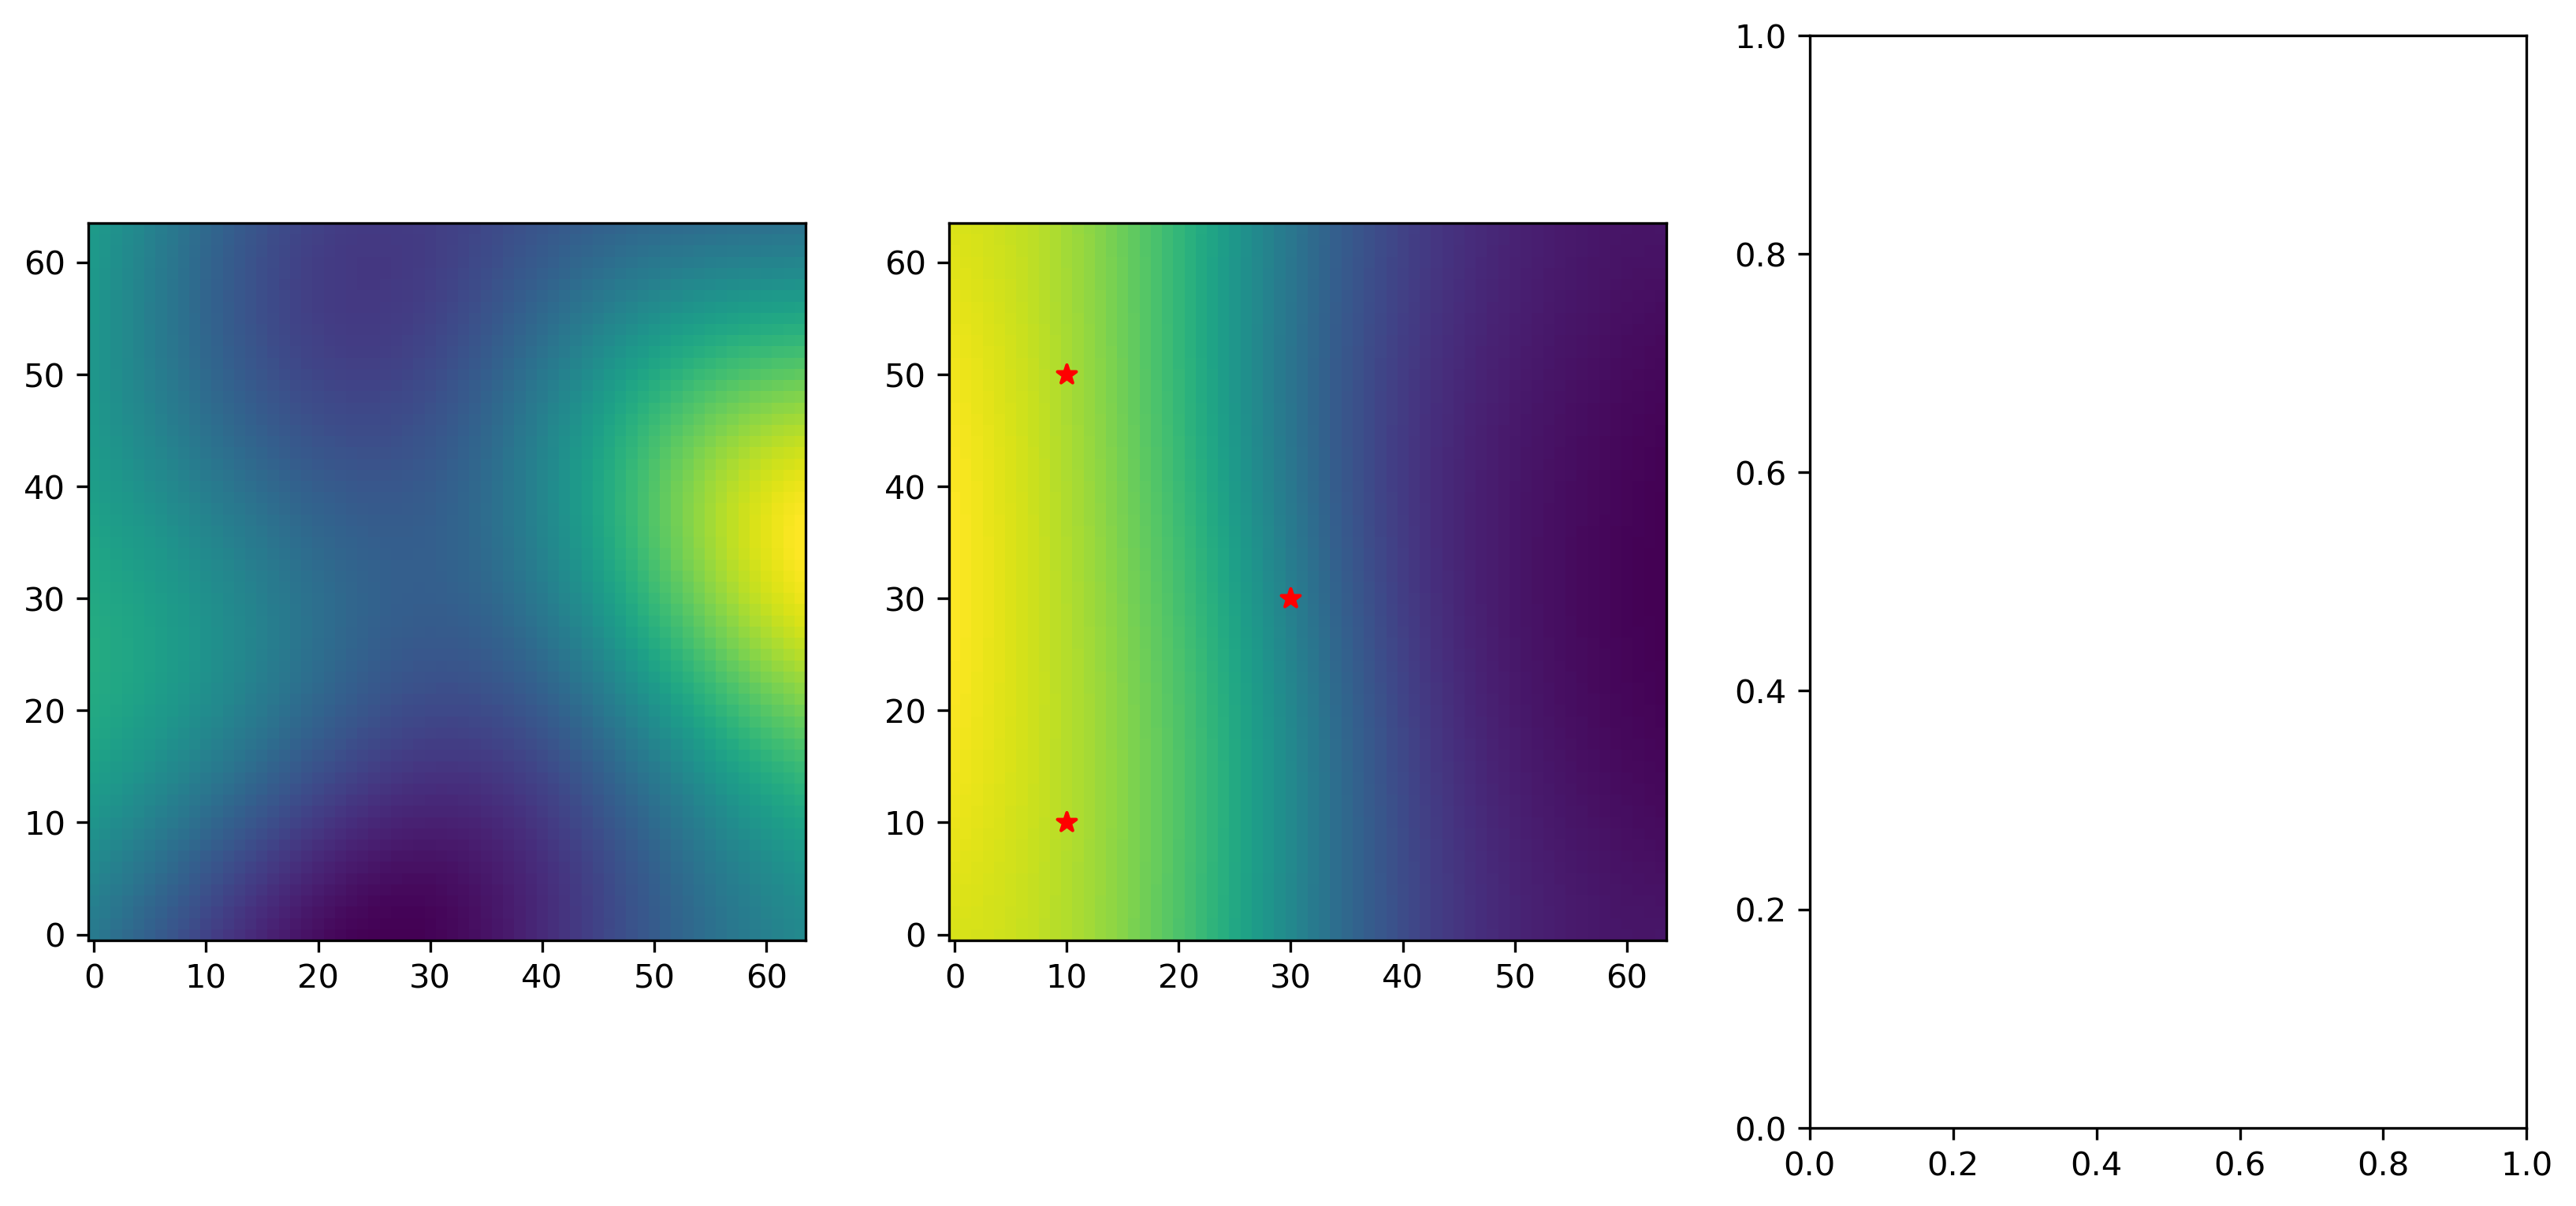

In [22]:
plt.figure(figsize=(18,6), dpi=300)
plt.subplot(141)
plt.imshow(log_kappa.T, cmap='viridis', origin='lower')
plt.subplot(142)
plt.imshow(u.T, cmap='viridis', origin='lower')
plt.scatter([x[1] for x in points], [x[0] for x in points], color='r', marker='*')
plt.subplot(143)
plt.show()

In [49]:
m = np.random.normal(0, 1, size=16)
e = np.random.uniform(size = 2)

In [50]:
kappa = kl.expansion(m)
print(kappa.shape)
u = pde_solution(kappa, e, verbose=False)
d = get_d_from_u(u, points)


(64, 64)


In [53]:
np.stack([kappa, u]).shape

(2, 64, 64)

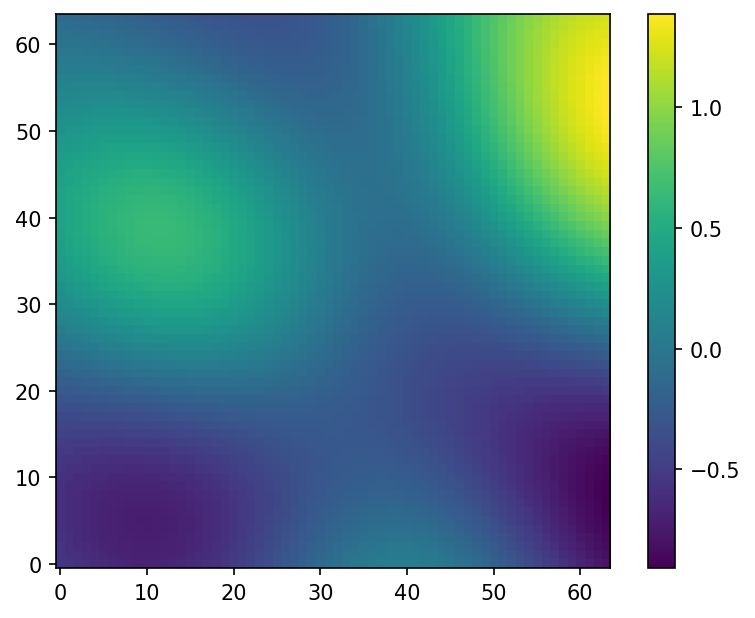

In [51]:
kl.visualize_field(kappa.T)

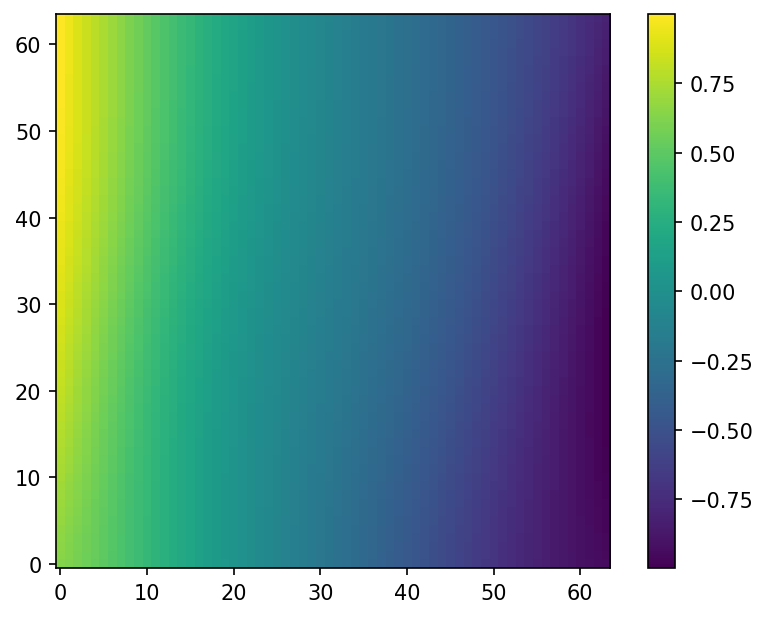

In [40]:
kl.visualize_field(u.T)

In [46]:
kl.vector

AttributeError: 'KLExpansion' object has no attribute 'vector'

In [3]:
x, y = kappa.shape

In [9]:
x

64